In [2]:
# Load the Drive helper and mount
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls "/content/drive/My Drive/B (test).png"

ls: cannot access '/content/drive/My Drive/B (test).png': No such file or directory


In [4]:
import cv2
import os
import numpy

def load_images_from_folder(folder):
  images = []
  labels = []
  for filename in os.listdir(folder):
    img = cv2.imread(os.path.join(folder,filename),0)
    if img is not None:
      img = cv2.bitwise_not(img);
      print(filename)
      images.append(img)
      labels.append(ord(filename[0])-ord('a'))
  return images, labels

In [5]:
#Load images from folder
folder = '/content/drive/MyDrive/train_letters'

images, labels = load_images_from_folder(folder)

a (1).png
a (2).png
a (3).png
a (4).png
a (5).png
a (6).png
a (7).png
a (8).png
a (9).png
a (10).png
a (11).png
b (1).png
b (2).png
b (3).png
b (4).png
b (5).png
b (6).png
b (7).png
b (8).png
b (9).png
b (10).png
b (11).png


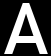

A


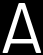

A


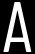

A


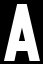

A


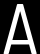

A


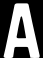

A


A


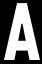

A


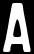

A


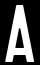

A


A


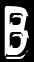

B


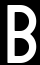

B


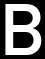

B


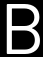

B


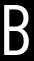

B


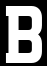

B


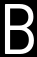

B


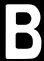

B


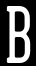

B


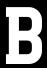

B


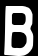

B


In [6]:
#Test if loading was successful
from google.colab.patches import cv2_imshow

for i in range(len(images)):
  cv2_imshow(images[i])
  print(chr(labels[i]+65))

In [9]:
# Function to compute the fourier descriptors
def findDescriptor(img):
    """ findDescriptor(img) finds and returns the
    Fourier-Descriptor of the image contour"""
    contour = []
    #Find object contour
    contour, hierarchy = cv2.findContours(
        img,
        cv2.RETR_EXTERNAL,
        cv2.CHAIN_APPROX_NONE,
        contour)

    #Create complex number using (x, y) coordinates of the contour points
    contour_array = contour[0][:, 0, :]
    contour_complex = numpy.empty(contour_array.shape[:-1], dtype=complex)
    contour_complex.real = contour_array[:, 0]
    contour_complex.imag = contour_array[:, 1]

    #Apply Fourier Transform (numpy.fft)
    fourier_result = numpy.fft.fft(contour_complex)

    return fourier_result

#Function that keeps a desired number of fourier descriptors (degree)
def truncate_descriptor(descriptors, degree):
    """this function truncates an unshifted fourier descriptor array
    and returns one also unshifted"""
    descriptors = numpy.fft.fftshift(descriptors)
    center_index = len(descriptors) / 2
    descriptors = descriptors[int(center_index - (degree / 2)):int(center_index + (degree / 2))]
    descriptors = numpy.fft.ifftshift(descriptors)
    return descriptors

In [10]:
# Function that computes Hu Moments
# Steps:
# 1. threshold image (cv2.threshold)
# 2. calculate moments (cv2.moments)
# 3. compute Hu Moments (cv2.HuMoments)

def fd_hu_moments(image):
  #step 1 => threshold
  _,image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)

  #step2 => moments
  moments = cv2.moments(image)

  #step 3 => Hu Moments
  huMoments = cv2.HuMoments(moments).flatten()

  return huMoments

### Test Hu Moments by performing geometric transformations

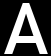

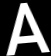

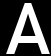

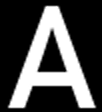

Moment 1
0.0010801330426470591
0.0010826348093137257
0.001073256242647059
0.0010821384401613304
0.0010801330426470591
0.0010801330426470591
0.0010801330426470591
Moment 2
2.079174934632747e-09
2.5374211247679118e-09
3.2334887743848984e-09
2.0856896104420327e-09
2.07917493463275e-09
2.07917493463275e-09
2.079174934632747e-09
Moment 3
1.4277900639753353e-11
1.3874047725795723e-11
1.6256044345556583e-11
1.4255163236401906e-11
1.4277900639752847e-11
1.4277900639753586e-11
1.4277900639753083e-11
Moment 4
3.788291218007319e-12
3.518980106329454e-12
5.7744310290625185e-12
3.7633190805141855e-12
3.7882912180073e-12
3.7882912180072935e-12
3.788291218007274e-12
Moment 5
2.5045494529783247e-23
2.30149856888024e-23
-3.37223319384886e-23
2.447459375388266e-23
2.5045494529782592e-23
2.5045494529782683e-23
2.504549452978203e-23
Moment 6
1.612608749160807e-16
1.3460321431309414e-16
-6.673318191109629e-17
1.5947129947217338e-16
1.6126087491607935e-16
1.6126087491607745e-16
1.6126087491607705e-16
Moment

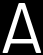

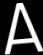

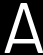

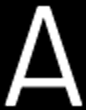

Moment 1
0.0009723132110189576
0.000980610757652826
0.0009670508464021182
0.00097978918359411
0.0009723132110189576
0.0009723132110189576
0.0009723132110189576
Moment 2
4.408177968823208e-08
4.440006966731354e-08
4.654543056968816e-08
4.357356931282668e-08
4.408177968823208e-08
4.408177968823208e-08
4.408177968823208e-08
Moment 3
1.451838093648489e-11
1.4535060597879476e-11
1.5565695391634894e-11
1.509130540172309e-11
1.4518380936484888e-11
1.4518380936484886e-11
1.4518380936484413e-11
Moment 4
1.0501759097596974e-12
1.4375416145836438e-12
1.448613246562788e-12
1.6675860328388254e-12
1.050175909759699e-12
1.0501759097597004e-12
1.0501759097597436e-12
Moment 5
3.88091179975002e-24
6.4707203841127774e-24
-2.293709142559556e-24
8.08169073407229e-24
3.880911799750009e-24
3.880911799749997e-24
3.8809117997501634e-24
Moment 6
2.1489076375550402e-16
2.874366160545634e-16
7.586519623718743e-17
3.42414935393494e-16
2.1489076375550357e-16
2.1489076375550323e-16
2.1489076375551178e-16
Moment 7
1.

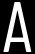

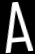

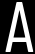

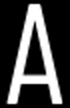

Moment 1
0.0010922210163287565
0.0010992442510397505
0.001087089239542185
0.001097957672845735
0.0010922210163287565
0.0010922210163287565
0.0010922210163287565
Moment 2
1.5380908205039995e-07
1.573717570661499e-07
1.5807710092132222e-07
1.5409274599972734e-07
1.5380908205039995e-07
1.5380908205040003e-07
1.5380908205040003e-07
Moment 3
1.205108065740596e-11
1.2752857433962034e-11
1.302357395166783e-11
1.2958356539199239e-11
1.2051080657406165e-11
1.2051080657405819e-11
1.205108065740589e-11
Moment 4
2.6508794069402773e-12
3.182370919863594e-12
3.3140912652887518e-12
3.200724955420504e-12
2.650879406940246e-12
2.6508794069402975e-12
2.6508794069402866e-12
Moment 5
1.476987360682048e-23
1.9438068749940586e-23
-1.1443285416488746e-24
2.0345820079580015e-23
1.4769873606820326e-23
1.476987360682057e-23
1.4769873606820523e-23
Moment 6
1.0308411487745622e-15
1.2615000762354493e-15
6.276990048013541e-16
1.2488150407563503e-15
1.030841148774549e-15
1.030841148774571e-15
1.0308411487745667e-15


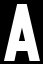

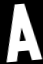

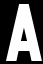

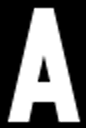

Moment 1
0.0014804681229754837
0.001487674631101949
0.00146410010133163
0.001481017910041322
0.001480468122975484
0.0014804681229754837
0.001480468122975484
Moment 2
1.929393884632706e-07
2.051103870987163e-07
2.1058727881815064e-07
1.9380619943070142e-07
1.9293938846327092e-07
1.9293938846327062e-07
1.929393884632709e-07
Moment 3
5.982908659212925e-11
6.513891425263036e-11
7.196659633937965e-11
5.99247952912593e-11
5.982908659212905e-11
5.982908659212886e-11
5.982908659212824e-11
Moment 4
5.749634212565818e-11
5.699904624072663e-11
6.54398909145973e-11
5.7341717283193336e-11
5.7496342125658225e-11
5.749634212565831e-11
5.7496342125658516e-11
Moment 5
3.2492174313737006e-21
3.3556399766968416e-21
8.271848600863906e-22
3.2329445772248695e-21
3.2492174313736987e-21
3.249217431373701e-21
3.249217431373702e-21
Moment 6
2.478854605719931e-14
2.4341867059502906e-14
1.6054035779347777e-14
2.474897823306201e-14
2.4788546057199368e-14
2.4788546057199365e-14
2.4788546057199466e-14
Moment 7
9.024

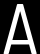

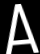

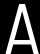

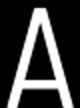

Moment 1
0.0009952594150577812
0.001001024247635241
0.0009905560922849029
0.0010009952247798102
0.0009952594150577816
0.0009952594150577812
0.0009952594150577816
Moment 2
5.516799146662412e-08
5.7928974245728705e-08
5.779537459705534e-08
5.437568076613715e-08
5.516799146662427e-08
5.516799146662412e-08
5.516799146662427e-08
Moment 3
8.763287439021274e-12
9.476272349301085e-12
9.923429113086062e-12
8.961305202272787e-12
8.763287439021496e-12
8.763287439021352e-12
8.76328743902134e-12
Moment 4
2.652954131380028e-12
3.224723051045046e-12
3.0269143525740194e-12
3.3204439024342606e-12
2.6529541313800637e-12
2.652954131380013e-12
2.6529541313800932e-12
Moment 5
1.2791694412814958e-23
1.773386951647547e-23
1.9250781724460693e-24
1.809984840852556e-23
1.2791694412815375e-23
1.2791694412814905e-23
1.2791694412815472e-23
Moment 6
6.231210403856268e-16
7.753897604569982e-16
4.1911767726713523e-16
7.741381106664568e-16
6.23121040385636e-16
6.231210403856233e-16
6.231210403856428e-16
Moment 7
6.975

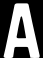

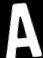

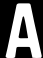

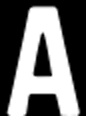

Moment 1
0.001417213286549562
0.0014152152515529983
0.0013984703227302013
0.0014088808887154913
0.001417213286549562
0.001417213286549562
0.001417213286549562
Moment 2
5.82839742728305e-08
7.52543712994208e-08
7.208360319918245e-08
6.068059186654496e-08
5.828397427283041e-08
5.8283974272830516e-08
5.82839742728304e-08
Moment 3
4.9282437390034375e-11
5.4503011883218763e-11
7.029243706014883e-11
4.622002662453003e-11
4.928243739003414e-11
4.928243739003434e-11
4.928243739003414e-11
Moment 4
2.193032031246442e-11
2.1284861661249705e-11
2.9484202724931215e-11
2.3749555963942083e-11
2.193032031246416e-11
2.193032031246443e-11
2.193032031246416e-11
Moment 5
6.8382787455664455e-22
7.03508123735609e-22
-8.374898748569386e-22
7.510901783215969e-22
6.8382787455663035e-22
6.838278745566442e-22
6.8382787455663035e-22
Moment 6
5.153714716310778e-15
5.359099703962806e-15
1.9426229908241288e-16
5.717784394104117e-15
5.153714716310707e-15
5.153714716310773e-15
5.153714716310709e-15
Moment 7
2.28404161

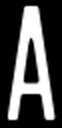

Moment 1
0.0013890000294110888
0.0013923452502265896
0.00138012348783571
0.0013894133203628278
0.0013890000294110888
0.0013890000294110888
0.0013890000294110888
Moment 2
6.546795252979379e-07
6.671767847734654e-07
6.691841934775605e-07
6.559151254609184e-07
6.546795252979379e-07
6.546795252979379e-07
6.546795252979379e-07
Moment 3
1.7140771809497036e-11
1.7830148501095355e-11
1.8921259575004322e-11
1.7624022205522922e-11
1.7140771809496952e-11
1.714077180949721e-11
1.7140771809497276e-11
Moment 4
3.1613146382213393e-12
3.647366191805107e-12
5.530108112244571e-12
3.5949039569567e-12
3.161314638221351e-12
3.1613146382213175e-12
3.1613146382213013e-12
Moment 5
2.2599267121745106e-23
2.9397965100379e-23
-2.1154859611054744e-23
2.8084217548365153e-23
2.2599267121745182e-23
2.259926712174494e-23
2.259926712174488e-23
Moment 6
2.5143597989636878e-15
2.9474293024469065e-15
4.133923421423263e-16
2.8833559598474733e-15
2.5143597989636972e-15
2.5143597989636665e-15
2.5143597989636605e-15
Moment 7

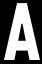

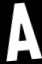

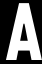

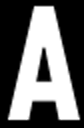

Moment 1
0.0014956443260565797
0.0014883989998925359
0.0014724643357187364
0.0014922541472634013
0.0014956443260565797
0.0014956443260565797
0.0014956443260565797
Moment 2
2.429618247521325e-07
2.53449662875228e-07
2.690247271997303e-07
2.443400599746305e-07
2.429618247521325e-07
2.429618247521325e-07
2.429618247521325e-07
Moment 3
7.614878135204851e-11
8.075411816284518e-11
9.12310458112506e-11
7.431955256116937e-11
7.614878135204878e-11
7.614878135204803e-11
7.614878135204828e-11
Moment 4
4.5056457847011855e-11
3.9028477280791376e-11
5.6404237228560786e-11
4.031229544490374e-11
4.50564578470118e-11
4.505645784701191e-11
4.505645784701189e-11
Moment 5
2.1140349439354164e-21
1.8324838792591912e-21
-5.942998517480787e-22
1.7418722795947367e-21
2.1140349439354156e-21
2.1140349439354246e-21
2.1140349439354243e-21
Moment 6
1.9891743164297206e-14
1.6235373041519733e-14
8.849803499989251e-15
1.7727425515864328e-14
1.989174316429718e-14
1.98917431642973e-14
1.9891743164297262e-14
Moment 7
1.5

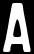

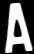

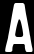

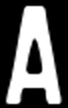

Moment 1
0.0014181730891923987
0.001426180304238146
0.0014005028591464466
0.0014220994298861087
0.0014181730891923983
0.0014181730891923987
0.0014181730891923983
Moment 2
2.5296815292486716e-07
2.6215212226322345e-07
2.72301776687895e-07
2.5376717661260885e-07
2.5296815292486674e-07
2.5296815292486706e-07
2.5296815292486663e-07
Moment 3
4.272153496787179e-11
4.266533828071179e-11
4.93062486945553e-11
4.2812846230749115e-11
4.272153496787168e-11
4.272153496787168e-11
4.272153496787191e-11
Moment 4
1.6269464217166686e-11
1.711544855484573e-11
2.37687701465807e-11
1.7237117166218554e-11
1.6269464217166715e-11
1.626946421716672e-11
1.626946421716667e-11
Moment 5
4.163113698869189e-22
4.616710480444531e-22
-3.396715917543049e-22
4.607836252486723e-22
4.163113698869193e-22
4.163113698869192e-22
4.1631136988691867e-22
Moment 6
8.071582154905317e-15
8.692788637850446e-15
2.3208420692813533e-15
8.613068831225387e-15
8.071582154905318e-15
8.07158215490532e-15
8.071582154905295e-15
Moment 7
1.032

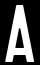

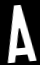

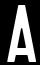

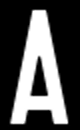

Moment 1
0.0012505393639941924
0.0012551685974316925
0.001246464781410571
0.0012520367181642635
0.0012505393639941926
0.0012505393639941926
0.0012505393639941928
Moment 2
2.2521559526879287e-07
2.3143005453727878e-07
2.29696561721264e-07
2.2609682165888758e-07
2.2521559526879318e-07
2.252155952687927e-07
2.2521559526879302e-07
Moment 3
1.477374574693919e-11
1.5342804116125274e-11
1.6211982895008445e-11
1.4668524745006885e-11
1.4773745746939406e-11
1.477374574693919e-11
1.477374574693924e-11
Moment 4
2.489305447692547e-11
2.7458968490316536e-11
2.5807659991887994e-11
2.5010253467342635e-11
2.4893054476925748e-11
2.4893054476925467e-11
2.4893054476925813e-11
Moment 5
4.707318482073166e-22
5.617389301072972e-22
3.674568489715377e-22
4.724732631628199e-22
4.70731848207328e-22
4.707318482073169e-22
4.7073184820732765e-22
Moment 6
1.1738288238433314e-14
1.3209385332862705e-14
1.05465645926569e-14
1.1814510504855672e-14
1.1738288238433454e-14
1.1738288238433314e-14
1.1738288238433486e-14
Mome

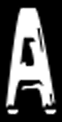

Moment 1
0.0014530203812727386
0.001454820597706658
0.0014487397634525537
0.0014533896832579093
0.0014530203812727386
0.0014530203812727386
0.0014530203812727386
Moment 2
6.921615318460585e-07
7.10019625147319e-07
6.991152255748918e-07
6.924457266568775e-07
6.921615318460585e-07
6.921615318460585e-07
6.921615318460585e-07
Moment 3
6.482155294467057e-12
5.4752084475506204e-12
1.0731261374965766e-11
6.423391494293703e-12
6.482155294467377e-12
6.482155294467039e-12
6.482155294467359e-12
Moment 4
7.260400083120042e-13
6.183644644803326e-13
2.869461613049883e-12
7.944121434282096e-13
7.260400083119145e-13
7.260400083119965e-13
7.260400083119068e-13
Moment 5
5.776612063284441e-25
-2.134057198669617e-25
1.365366282417e-23
3.7704696200107865e-25
5.776612063285314e-25
5.776612063283865e-25
5.776612063284739e-25
Moment 6
2.0218436631530402e-16
2.0268563981481805e-16
-1.2083920519254489e-15
2.8498737066601633e-16
2.0218436631523105e-16
2.021843663153107e-16
2.0218436631523768e-16
Moment 7
-1.4653

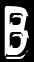

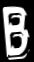

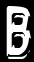

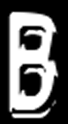

Moment 1
0.001479290975301549
0.0014777197241141495
0.001486292579961556
0.001479579549717768
0.0014792909753015486
0.001479290975301549
0.0014792909753015486
Moment 2
5.521217508271107e-07
5.629663964694832e-07
5.417044301370426e-07
5.52742066524165e-07
5.521217508271101e-07
5.521217508271107e-07
5.521217508271101e-07
Moment 3
7.091194128104564e-13
3.010329810266145e-12
3.3868861695081376e-12
7.335114828535339e-13
7.091194128106038e-13
7.09119412810533e-13
7.091194128104849e-13
Moment 4
2.555727033038007e-12
3.4625746314076356e-12
7.909327664759548e-13
2.688684011643605e-12
2.5557270330379385e-12
2.555727033037949e-12
2.555727033037996e-12
Moment 5
-1.5610010893656698e-24
2.0104368468251717e-24
-8.188400673023937e-25
-1.8625656860012293e-24
-1.561001089365631e-24
-1.561001089365668e-24
-1.5610010893657789e-24
Moment 6
-1.5354005230559659e-15
-2.4487625773564024e-15
-3.4079879511150875e-16
-1.5925029128890974e-15
-1.5354005230559519e-15
-1.535400523055944e-15
-1.5354005230559736e-15
Mo

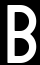

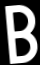

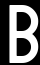

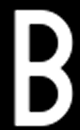

Moment 1
0.001457774990228723
0.0014183344633272594
0.001443578451627183
0.0013984777375762906
0.001457774990228723
0.001457774990228723
0.001457774990228723
Moment 2
3.32814785776296e-07
3.245987986300399e-07
3.4986625285597e-07
3.04982125438033e-07
3.32814785776296e-07
3.32814785776296e-07
3.32814785776296e-07
Moment 3
5.899131905329062e-12
2.4158092992319127e-12
7.324153385957323e-12
5.175384676022031e-12
5.8991319053290424e-12
5.899131905329181e-12
5.899131905329124e-12
Moment 4
4.163255430541873e-12
3.5899140719758514e-12
9.70817885061958e-12
3.5965565037277724e-12
4.163255430541913e-12
4.163255430541849e-12
4.1632554305419715e-12
Moment 5
1.449444955932989e-23
9.989093123661127e-24
1.480762765814211e-23
1.5440744557604855e-23
1.4494449559329845e-23
1.4494449559330562e-23
1.4494449559330432e-23
Moment 6
2.175915169157478e-15
1.140054513271954e-15
-1.6670622109339568e-15
9.505218058852135e-16
2.1759151691575006e-15
2.1759151691574423e-15
2.175915169157514e-15
Moment 7
-1.4683149692

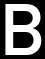

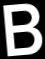

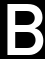

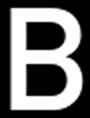

Moment 1
0.0013518828466134588
0.001348412493227564
0.0013526224847290394
0.0013398742213155284
0.0013518828466134588
0.001351882846613459
0.001351882846613459
Moment 2
1.0836763868988713e-07
1.0902951358978249e-07
1.0787854802861666e-07
1.0063413050593251e-07
1.0836763868988713e-07
1.0836763868988698e-07
1.0836763868988698e-07
Moment 3
2.869703674864826e-12
3.2472752541725562e-12
3.776872197377488e-12
2.9580242244418926e-12
2.8697036748648423e-12
2.8697036748648435e-12
2.8697036748648928e-12
Moment 4
1.148051761749496e-12
4.1736177764433467e-13
6.941095321701306e-13
2.8882617625344753e-13
1.1480517617495012e-12
1.148051761749512e-12
1.1480517617495274e-12
Moment 5
1.787979010076058e-24
4.576110510954212e-25
-2.765804355703205e-25
-5.058015254152808e-26
1.787979010076064e-24
1.787979010076118e-24
1.7879790100761366e-24
Moment 6
-3.4236813233256587e-16
-1.373703677056197e-16
-1.6483956485941672e-16
-3.1727385841896174e-17
-3.4236813233256415e-16
-3.4236813233257386e-16
-3.42368132332569

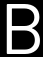

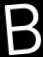

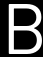

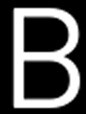

Moment 1
0.0010278008203391568
0.0010369972425002749
0.0010187676347948142
0.0010414375795137747
0.0010278008203391568
0.001027800820339157
0.001027800820339157
Moment 2
6.907354350808247e-08
7.049590974933632e-08
7.393864592708432e-08
6.872138358967804e-08
6.907354350808247e-08
6.90735435080824e-08
6.90735435080824e-08
Moment 3
7.536681483714692e-13
7.531053348960494e-13
7.980685859502565e-13
8.783939004248093e-13
7.536681483714122e-13
7.536681483714676e-13
7.536681483714511e-13
Moment 4
6.30211194750875e-14
1.3347159480164965e-14
4.755628890930648e-13
3.955539093617595e-14
6.302111947508449e-14
6.302111947508743e-14
6.302111947508827e-14
Moment 5
-1.260151816074528e-26
-5.4828410191250165e-28
-2.578610112931658e-25
-7.372818042376035e-27
-1.2601518160743005e-26
-1.2601518160745397e-26
-1.260151816074453e-26
Moment 6
-1.6282004378350304e-17
-2.0591623094166437e-18
-1.2719299072013128e-16
-1.0346516797065241e-17
-1.6282004378349053e-17
-1.6282004378350316e-17
-1.6282004378350042e-17
Mo

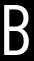

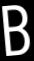

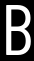

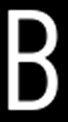

Moment 1
0.001243280206016929
0.0012580936668274089
0.0012487487396599987
0.0012532996146694829
0.001243280206016929
0.001243280206016929
0.001243280206016929
Moment 2
4.266338306355475e-07
4.4141029375584544e-07
4.1948605515592674e-07
4.322397499762211e-07
4.266338306355475e-07
4.266338306355475e-07
4.266338306355475e-07
Moment 3
7.740180455160646e-14
9.957969294040652e-13
1.0241953210301677e-12
9.688740734755458e-14
7.740180455159226e-14
7.740180455162485e-14
7.740180455161069e-14
Moment 4
7.709555289195932e-13
7.18462588010596e-13
3.5974258339958494e-13
8.397196961593602e-13
7.709555289196024e-13
7.709555289195935e-13
7.709555289196028e-13
Moment 5
-1.8831115216962678e-25
-5.709877706057372e-25
2.179539418102019e-25
-2.3907778862980133e-25
-1.8831115216961294e-25
-1.8831115216964926e-25
-1.8831115216963546e-25
Moment 6
-1.5691737222624517e-16
-3.1887338306965793e-16
1.494083617774596e-16
-1.786518631778626e-16
-1.569173722262392e-16
-1.5691737222626137e-16
-1.5691737222625545e-16
Mo

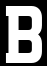

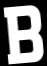

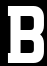

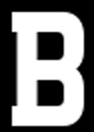

Moment 1
0.0017549028435104783
0.0017125393679899951
0.0017266995798642173
0.00169855015707922
0.0017549028435104783
0.0017549028435104783
0.0017549028435104783
Moment 2
1.9264965900052974e-07
1.9577209346337677e-07
2.1966052464643375e-07
1.773945957413824e-07
1.9264965900052971e-07
1.9264965900052971e-07
1.9264965900052974e-07
Moment 3
9.917800435905157e-12
5.14684574155032e-12
9.076710655425431e-12
1.0355440334569448e-11
9.917800435904968e-12
9.917800435904369e-12
9.917800435904366e-12
Moment 4
1.5485141952467646e-11
1.2011366319763934e-11
4.434893423892875e-11
1.4638584667610626e-11
1.548514195246758e-11
1.5485141952467604e-11
1.548514195246757e-11
Moment 5
1.6020963630745135e-22
9.170778989636096e-23
-8.831514457340807e-23
1.801654340333056e-22
1.6020963630744874e-22
1.6020963630744312e-22
1.6020963630744314e-22
Moment 6
5.2416463713281745e-15
1.6149701467804134e-15
-1.0826091432006232e-14
2.843845666418196e-15
5.2416463713281784e-15
5.2416463713282005e-15
5.241646371328177e-15
Mom

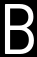

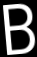

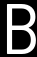

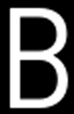

Moment 1
0.0011333090180029068
0.001150784643857543
0.0011284125812506594
0.0011465285538355737
0.0011333090180029063
0.0011333090180029068
0.0011333090180029063
Moment 2
1.9935390845750582e-07
2.0798441463999465e-07
2.0380089679023037e-07
2.0219591413496006e-07
1.9935390845750545e-07
1.9935390845750582e-07
1.9935390845750545e-07
Moment 3
1.0769741598647861e-12
1.0962723554584595e-12
1.611262272895251e-12
1.3481875863962872e-12
1.0769741598648713e-12
1.0769741598649677e-12
1.0769741598648901e-12
Moment 4
5.919523971805324e-16
2.3278643515972017e-14
3.3079077295449987e-13
8.744995374266303e-15
5.919523971797477e-16
5.919523971790315e-16
5.919523971795994e-16
Moment 5
1.4594998752317136e-29
-3.43389160637051e-27
-2.2280232555122697e-25
-9.145701857403743e-28
1.459499875229145e-29
1.4594998752263702e-29
1.4594998752285943e-29
Moment 6
-2.5727217762571935e-19
-3.3867813945164296e-19
-1.476804202091565e-16
2.623346894012655e-18
-2.57272177625414e-19
-2.5727217762507893e-19
-2.57272177625347

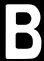

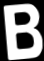

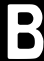

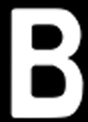

Moment 1
0.0016454781134517009
0.0016524078232370394
0.0016168437299386416
0.001642386541261034
0.0016454781134517009
0.0016454781134517009
0.0016454781134517009
Moment 2
1.5165485227360264e-07
1.797529897241653e-07
1.7763738754753254e-07
1.5550549683334822e-07
1.5165485227360264e-07
1.5165485227360264e-07
1.5165485227360266e-07
Moment 3
2.8370420393968243e-12
1.9489291912184418e-13
2.683279483296516e-12
5.046093989914649e-12
2.8370420393967285e-12
2.8370420393965734e-12
2.8370420393965456e-12
Moment 4
4.115445321268734e-12
4.824962510816779e-12
1.2473025070608237e-11
4.487201544742605e-12
4.115445321268586e-12
4.1154453212688035e-12
4.115445321268538e-12
Moment 5
-2.2838790838745624e-24
-4.3838512518242064e-24
-6.909289830420214e-23
3.077457584076116e-24
-2.2838790838755042e-24
-2.2838790838751597e-24
-2.2838790838753995e-24
Moment 6
1.5724651921050059e-15
1.9238671875927195e-15
-3.576062584304599e-15
1.7608030246949248e-15
1.5724651921049477e-15
1.5724651921050264e-15
1.5724651921049

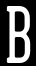

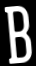

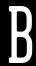

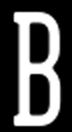

Moment 1
0.0012837506225820516
0.0012582741381612938
0.001275161845223673
0.0012694452628929582
0.0012837506225820516
0.0012837506225820516
0.0012837506225820516
Moment 2
3.862895244852196e-07
3.778574166192347e-07
3.972457550172294e-07
3.746711888504597e-07
3.862895244852196e-07
3.862895244852196e-07
3.862895244852196e-07
Moment 3
1.600517045238866e-12
7.307381829977552e-13
1.7908832254401281e-12
1.8486020454012526e-12
1.6005170452388769e-12
1.600517045238774e-12
1.6005170452387908e-12
Moment 4
1.2534315757586625e-12
1.3763501845352098e-12
3.5755371720223585e-12
1.1754985092340473e-12
1.2534315757587263e-12
1.2534315757586716e-12
1.2534315757587174e-12
Moment 5
1.6715580455408054e-24
1.3617447167621706e-24
-1.1850881150185891e-24
1.5179338261683864e-24
1.6715580455409432e-24
1.671558045540768e-24
1.671558045540891e-24
Moment 6
5.614825203180934e-16
3.5352439575569697e-16
-1.07575116584487e-15
1.176198074739425e-16
5.6148252031813325e-16
5.614825203180993e-16
5.614825203181271e-16
Mome

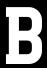

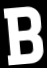

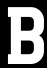

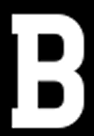

Moment 1
0.0016638254387379842
0.0016529536909835657
0.0016408018025947098
0.0016550282607501964
0.0016638254387379837
0.0016638254387379842
0.0016638254387379837
Moment 2
2.423620053514933e-07
2.508544463526857e-07
2.665535921017697e-07
2.3957850486832895e-07
2.4236200535149287e-07
2.423620053514933e-07
2.4236200535149287e-07
Moment 3
1.5034159208838967e-11
7.735330340785164e-12
2.0534621530952528e-11
1.4675755221249982e-11
1.503415920883922e-11
1.5034159208839057e-11
1.503415920883916e-11
Moment 4
1.4546492273858193e-11
1.091525800217393e-11
3.829009301193727e-11
1.3267496728843446e-11
1.4546492273857902e-11
1.4546492273858413e-11
1.4546492273858041e-11
Moment 5
2.1511811610735e-22
9.521162784847295e-23
-1.678091164582639e-22
1.8513125138754317e-22
2.1511811610734536e-22
2.151181161073555e-22
2.1511811610734804e-22
Moment 6
4.041131192605297e-15
2.870028468593361e-15
-1.0140127962689961e-14
3.5774132126087655e-15
4.041131192605091e-15
4.041131192605233e-15
4.041131192605028e-15
Momen

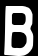

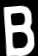

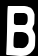

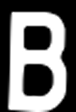

Moment 1
0.0014263092638778054
0.001432901966622448
0.0014250686716474077
0.0014345995107891375
0.0014263092638778054
0.0014263092638778054
0.0014263092638778054
Moment 2
1.7195411127869482e-07
1.7353662560455636e-07
1.7217102166016222e-07
1.741272339727787e-07
1.7195411127869482e-07
1.7195411127869482e-07
1.7195411127869487e-07
Moment 3
8.668322447339059e-12
2.688624201567537e-12
2.5047803148688538e-12
8.835714035829139e-12
8.668322447338912e-12
8.668322447338755e-12
8.66832244733885e-12
Moment 4
9.088386988450023e-12
1.3517659146951754e-11
1.166398622086247e-11
8.365107051806658e-12
9.08838698844979e-12
9.088386988449952e-12
9.088386988449872e-12
Moment 5
-6.199177909400924e-23
-7.91064575591437e-23
5.853119821886259e-23
-4.7878302617041435e-23
-6.19917790940078e-23
-6.19917790940067e-23
-6.199177909400829e-23
Moment 6
3.171885496393525e-15
4.9246619831788754e-15
2.2619571066424596e-15
3.1554596779418712e-15
3.171885496393417e-15
3.17188549639351e-15
3.1718854963934754e-15
Moment 7
-

In [12]:
for img in images:
  cv2_imshow(img)
  (h, w) = img.shape[:2]
  (cX, cY) = (w // 2, h // 2)

  #Rotation
  MRotation = cv2.getRotationMatrix2D((cX, cY), 5, 1.0)
  rotated = cv2.warpAffine(img, MRotation, (w, h))
  cv2_imshow(rotated)
 
  #Translation: tx = x-axis, ty = y-axis
  #      1 0 tx
  #  M = 0 1 ty
  MTranslation = numpy.float32([[1,0,2],[0,1,0]])
  translated = cv2.warpAffine(img,MTranslation,(w,h))
  cv2_imshow(translated)

  #Scaling
  scaled = cv2.resize(img,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
  cv2_imshow(scaled)

  #Flipping
  #around x
  flipVertical = cv2.flip(img, 0)

  #around y
  flipHorizontal = cv2.flip(img, 1)

  #around xy
  flipBoth = cv2.flip(img, -1)

  hu_img = fd_hu_moments(img)
  hu_rot = fd_hu_moments(rotated)
  hu_trans= fd_hu_moments(translated)
  hu_scal = fd_hu_moments(scaled)
  hu_flipV = fd_hu_moments(flipVertical)
  hu_flipH = fd_hu_moments(flipHorizontal)
  hu_flipVH = fd_hu_moments(flipBoth)
  

  for i in range(0, 7):
    print("Moment "+str(i+1))
    print(hu_img[i])
    print(hu_rot[i])
    print(hu_trans[i])
    print(hu_scal[i])
    print(hu_flipV[i])
    print(hu_flipH[i])
    print(hu_flipVH[i])

In [14]:
import numpy as np
import cv2 as cv

In [15]:
svm = cv.ml.SVM_create()

#set SVM params
svm.setType(cv.ml.SVM_C_SVC)
svm.setKernel(cv.ml.SVM_LINEAR)
svm.setTermCriteria((cv.TERM_CRITERIA_MAX_ITER, 100, 1e-6))

In [16]:
# scale an input array-like to a mininum and maximum number
# the input array must be of a floating point array
# if you have a non-floating point array, convert to floating using `astype('float')`
# this works with n-dimensional arrays
# it will mutate in place
# min and max can be integers
def scale_range (input, min, max):
    input += -(np.min(input))
    input /= np.max(input) / (max - min)
    input += min
    return input

### Train&Test SVM with Fourier Descriptors

In [17]:
#features extraction FD
NUM_DESCRIPTORS = 18
global_features = []
for img in images:
  fd = findDescriptor(img) 
  descriptors = truncate_descriptor(fd, NUM_DESCRIPTORS)
  descriptors = scale_range(descriptors, 0, 1)
  global_feature = np.hstack([descriptors.real, descriptors.imag])
  global_features.append(global_feature)

In [18]:
#set up training data
class_labels = np.array(labels)
trainingData = np.matrix(global_features,dtype=np.float32)
print(class_labels.shape)
print(trainingData.shape)

(22,)
(22, 36)


In [20]:
# Train the linear SVM
svm.train(trainingData, cv.ml.ROW_SAMPLE, class_labels)

True

172


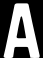

Label: A
Prediction: A


In [23]:
img = images[5]

#find descriptors
descriptors = findDescriptor(img)

#truncate descriptor
print(len(descriptors))
descriptors = truncate_descriptor(descriptors, NUM_DESCRIPTORS)

#scale to [0, 1] range the truncated descriptor
fd_img = scale_range(descriptors, 0, 1)

#create input to SVM (fd_imag is the scaled truncated descriptor)
FD_feature = np.hstack([fd_img.real, fd_img.imag])
testData = np.matrix(FD_feature, dtype=np.float32)

#feed testData input to SVM
_, response = svm.predict(testData)

cv2_imshow(img)
print("Label: A")
print("Prediction: " + chr(65+response))

### Train&Test SVM with Hu Moments

In [24]:
#feature extraction of Hu moments for each image, result is a list of lists (global_features)
global_features = []
for image in images:
  hu_mom = fd_hu_moments(image)
  global_features.append(hu_mom)

In [25]:
#set up labels & training data
class_labels = np.array(labels)
trainingData = np.matrix(global_features,dtype=np.float32)
print(class_labels.shape)
print(trainingData.shape)

(22,)
(22, 7)


In [26]:
#Train the SVM with the new training data (Hu moments)
svm.train(trainingData, cv.ml.ROW_SAMPLE, class_labels)

True

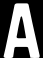

Label: A
Prediction: A


In [28]:
img = images[5]

#compute Hu moments
hu_mom = fd_hu_moments(img)

#scale the Hu moments to [0, 1]
fd_img = scale_range(hu_mom, 0, 1)

#cast test data to float32 matrix
testData = np.matrix(fd_img, dtype=np.float32)


#feed data to SVM
_, respone = svm.predict(testData)

cv2_imshow(img)
print("Label: A")
print("Prediction: "+chr(65+response))

### Train&Test with Fourier Descriptors and Hu Moments

In [29]:
#feature extraction FD + Hu Moments for each image
NUM_DESCRIPTORS = 18
global_features = []
for img in images:
  fd = findDescriptor(img) 
  descriptors = truncate_descriptor(fd, NUM_DESCRIPTORS)
  descriptors = scale_range(descriptors, 0, 1)
  global_feature = np.hstack([descriptors.real, descriptors.imag])
  fd_img = fd_hu_moments(img)
  global_features.append(np.append(global_feature, fd_img))

In [30]:
#set up training data
class_labels = np.array(labels)
trainingData = np.matrix(global_features, dtype=np.float32)
print(class_labels.shape)
print(trainingData.shape)

(22,)
(22, 43)


In [31]:
#Train the SVM
svm.train(trainingData, cv.ml.ROW_SAMPLE, class_labels)

True

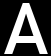

A
Prediction: A


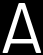

A
Prediction: A


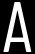

A
Prediction: A


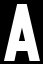

A
Prediction: A


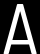

A
Prediction: A


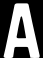

A
Prediction: A


A
Prediction: A


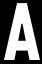

A
Prediction: A


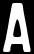

A
Prediction: A


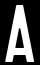

A
Prediction: A


A
Prediction: A


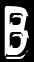

B
Prediction: B


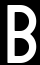

B
Prediction: B


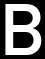

B
Prediction: B


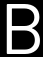

B
Prediction: B


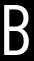

B
Prediction: B


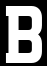

B
Prediction: B


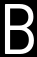

B
Prediction: B


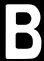

B
Prediction: B


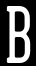

B
Prediction: B


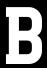

B
Prediction: B


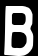

B
Prediction: B


In [32]:
#Test on random image with FD + Hu Moments
for i in range(len(images)):
  testData = np.matrix(global_features[i], dtype=np.float32)
  _, response = svm.predict(testData)
  cv2_imshow(images[i])
  print(chr(labels[i]+65))
  print("Prediction: "+chr(65+response))

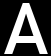

A
Prediction: A


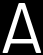

A
Prediction: A


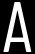

A
Prediction: A


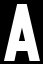

A
Prediction: A


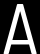

A
Prediction: A


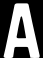

A
Prediction: A


A
Prediction: A


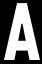

A
Prediction: A


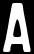

A
Prediction: A


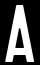

A
Prediction: A


A
Prediction: A


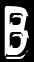

B
Prediction: B


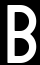

B
Prediction: B


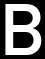

B
Prediction: B


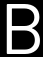

B
Prediction: B


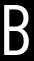

B
Prediction: B


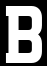

B
Prediction: B


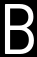

B
Prediction: B


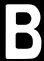

B
Prediction: B


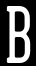

B
Prediction: B


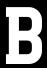

B
Prediction: B


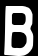

B
Prediction: B


Predictions: 100.0


In [34]:
#complete the training dataset with all uppercase letters, train & test the SVM
n = 0
for i in range(len(images)):
  testData = np.matrix(global_features[i], dtype=np.float32)
  _, response = svm.predict(testData)
  cv2_imshow(images[i])
  print(chr(labels[i]+65))
  print("Prediction: "+chr(65+response))
  if response == response:
    n += 1

print('\n\nPredictions: ' + str((n/len(labels)) * 100))